<a href="https://colab.research.google.com/github/will-cotton4/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_223_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

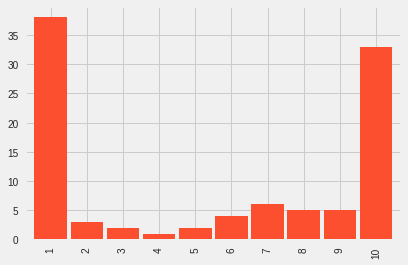

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

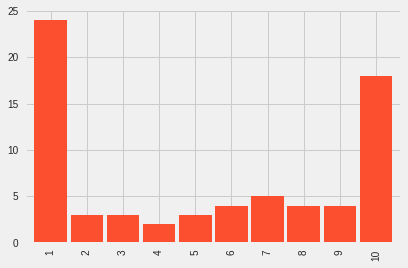

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

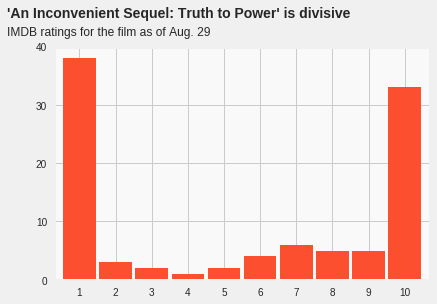

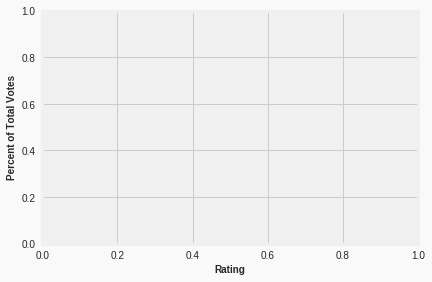

In [5]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='C1', width=0.9);

ax.set(yticks = range(0,50,10))
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')

plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

ax.text(x=-2, y=45,
        s="'An Inconvenient Sequel: Truth to Power' is divisive",
        fontsize = 14, fontweight = 'bold');

ax.text(x=-2, y=42,
        s="IMDB ratings for the film as of Aug. 29",
        fontsize = 12);

ax.tick_params(labelrotation=0)

ax.set_facecolor('#f9f9f9')

In [6]:
display(example)

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [8]:
pd.set_option('display.max_columns', 500)
df.sample(1).T

,70160
timestamp,2017-08-26 08:30:04.256294
respondents,392
category,Males Aged 18-29
link,http://www.imdb.com/title/tt6322922/ratings-ma...
average,6.2
mean,6.4
median,8
1_votes,113
2_votes,3
3_votes,4


In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
df['timestamp'].describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df = df.set_index('timestamp')

In [12]:
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [0]:
lastday = df['2017-08-29']

In [14]:
lastday[lastday['category'] == 'IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:50:05.826082,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:00:05.483262,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:10:06.038644,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:20:05.807155,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


In [0]:
final = lastday[lastday['category'] == 'IMDb users'].tail(1)

In [16]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
data = final[pct_columns].T
data.index = range(1,11)

<Figure size 432x288 with 0 Axes>

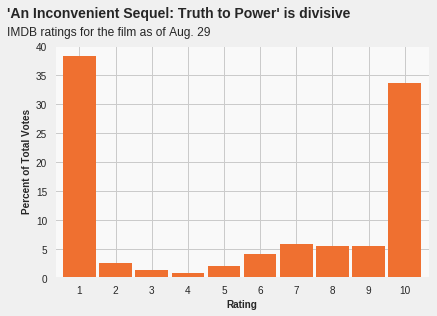

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure();

ax = data.plot.bar(color='#ef7030', width=0.9)
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

ax.text(x=-2, y=45,
        s="'An Inconvenient Sequel: Truth to Power' is divisive",
        fontsize = 14, fontweight = 'bold');

ax.text(x=-2, y=42,
        s="IMDB ratings for the film as of Aug. 29",
        fontsize = 12);
ax.get_legend().remove()
ax.tick_params(labelrotation=0)

ax.set_facecolor('#f9f9f9')

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









## My reproduction of the Thanksgiving chart:

In [0]:
import altair as alt
import pandas as pd

thanksgiving = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv')

In [0]:
list(thanksgiving)
cols_dict = {'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread': 'Cornbread',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole': 'Green beans/casserole',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese': 'Mac and cheese',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits': 'Rolls/biscuits',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash': 'Squash',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad':'Salad'}

In [0]:
thanksgiving = thanksgiving.rename(columns = cols_dict)

In [22]:
(thanksgiving['US Region']=='East North Central').value_counts()[True]

150

In [23]:
(thanksgiving['Cornbread'].value_counts())

Cornbread    235
Name: Cornbread, dtype: int64

In [0]:
region_groups = thanksgiving.groupby(by='US Region')

In [25]:
region_groups['Cornbread'].value_counts()

US Region           Cornbread
East North Central  Cornbread    23
East South Central  Cornbread    16
Middle Atlantic     Cornbread    33
Mountain            Cornbread    10
New England         Cornbread    10
Pacific             Cornbread    37
South Atlantic      Cornbread    53
West North Central  Cornbread    12
West South Central  Cornbread    34
Name: Cornbread, dtype: int64

In [26]:
import numpy as np
regions = list(thanksgiving['US Region'].unique())
regions = [x for x in regions if str(x) != 'nan']
regions

['Middle Atlantic',
 'East South Central',
 'Mountain',
 'Pacific',
 'East North Central',
 'West North Central',
 'West South Central',
 'South Atlantic',
 'New England']

In [27]:
thanksgiving.groupby

<bound method NDFrame.groupby of       RespondentID Do you celebrate Thanksgiving?  \
0       4337954960                            Yes   
1       4337951949                            Yes   
2       4337935621                            Yes   
3       4337933040                            Yes   
4       4337931983                            Yes   
5       4337929779                            Yes   
6       4337924420                            Yes   
7       4337916002                            Yes   
8       4337914977                            Yes   
9       4337899817                            Yes   
10      4337899680                             No   
11      4337893416                            Yes   
12      4337888291                            Yes   
13      4337878450                            Yes   
14      4337878351                            Yes   
15      4337857295                            Yes   
16      4337856362                            Yes   
17      43378

**Here I'll use a loop to go through the column renaming `dict` that I just made and create a `Dataframe` with corresponding `value_counts`:**

In [0]:
popular_side_dishes = pd.DataFrame(index = regions, columns = list(cols_dict.values()))

In [29]:
popular_side_dishes

,Cornbread,Green beans/casserole,Mac and cheese,Rolls/biscuits,Squash,Salad
Middle Atlantic,NaN,NaN,NaN,NaN,NaN,NaN
East South Central,NaN,NaN,NaN,NaN,NaN,NaN
Mountain,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,NaN,NaN,NaN,NaN,NaN,NaN
East North Central,NaN,NaN,NaN,NaN,NaN,NaN
West North Central,NaN,NaN,NaN,NaN,NaN,NaN
West South Central,NaN,NaN,NaN,NaN,NaN,NaN
South Atlantic,NaN,NaN,NaN,NaN,NaN,NaN
New England,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Kind of hacky, but it seems to work. The outer loop goes through all the side
#dishes that I renamed (the ones from the original map), and the inner loop goes
#through each region, replacing the corresponding entry in our side dish DataFrame
#with its count in the survey data.

for side_dish in list(cols_dict.values()):
  i=0
  for region in regions:
    popular_side_dishes.loc[region][side_dish] = list(region_groups[side_dish].value_counts())[i]
    i+=1

In [31]:
popular_side_dishes

,Cornbread,Green beans/casserole,Mac and cheese,Rolls/biscuits,Squash,Salad
Middle Atlantic,23,103,21,123,15,26
East South Central,16,49,21,49,12,8
Mountain,33,92,20,106,44,33
Pacific,10,31,3,33,5,12
East North Central,10,33,6,41,31,11
West North Central,37,84,18,99,17,39
West South Central,53,150,79,158,31,39
South Atlantic,12,60,12,62,2,15
New England,34,66,20,73,8,15


In [32]:
#Here we need to change the entries in the dataframe to integers:
popular_side_dishes.dtypes

Cornbread                object
Green beans/casserole    object
Mac and cheese           object
Rolls/biscuits           object
Squash                   object
Salad                    object
dtype: object

In [0]:
for col in list(cols_dict.values()):
  popular_side_dishes[col] = popular_side_dishes[col].astype(int)

In [0]:
total_survey=0
popular_side_dishes['Totals by region'] = popular_side_dishes['Cornbread']
for region in regions:
  region_pop = (thanksgiving['US Region']==region).value_counts()[True]
  popular_side_dishes['Totals by region'].loc[region] = region_pop
  total_survey += region_pop
popular_side_dishes['Totals by region'].loc['All of US'] = total_survey

In [0]:
sums_of_dishes = {row:sum(popular_side_dishes.T.loc[row]) for row in popular_side_dishes}

In [0]:
popular_side_dishes = popular_side_dishes.append(pd.DataFrame(sums_of_dishes, index = ['All of US']))

In [0]:
popular_side_dishes

In [0]:
# None of these numbers make any sense relative to the graph on the site, but I'm
# kind of over this graph so I'm just going to make my own.

popular_side_dishes['Cornbread']/popular_side_dishes['Totals by region']

None of these numbers make any sense relative to the graph on the site, but I'm kind of over this graph anyway so I'm just going to make my own.

ValueError: ignored

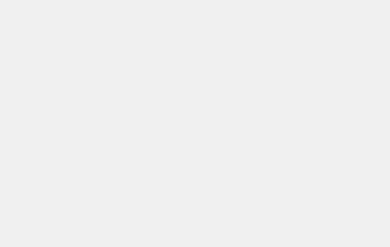

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
counts = [cb_count for cb_count in popular_side_dishes['Cornbread']]

Sankey(flows = counts,
       labels = list(popular_side_dishes.index).append(' '),
       orientations=[-1-1,0,1,1,-1,1,0,-1,-1,-1]
      ).finish()

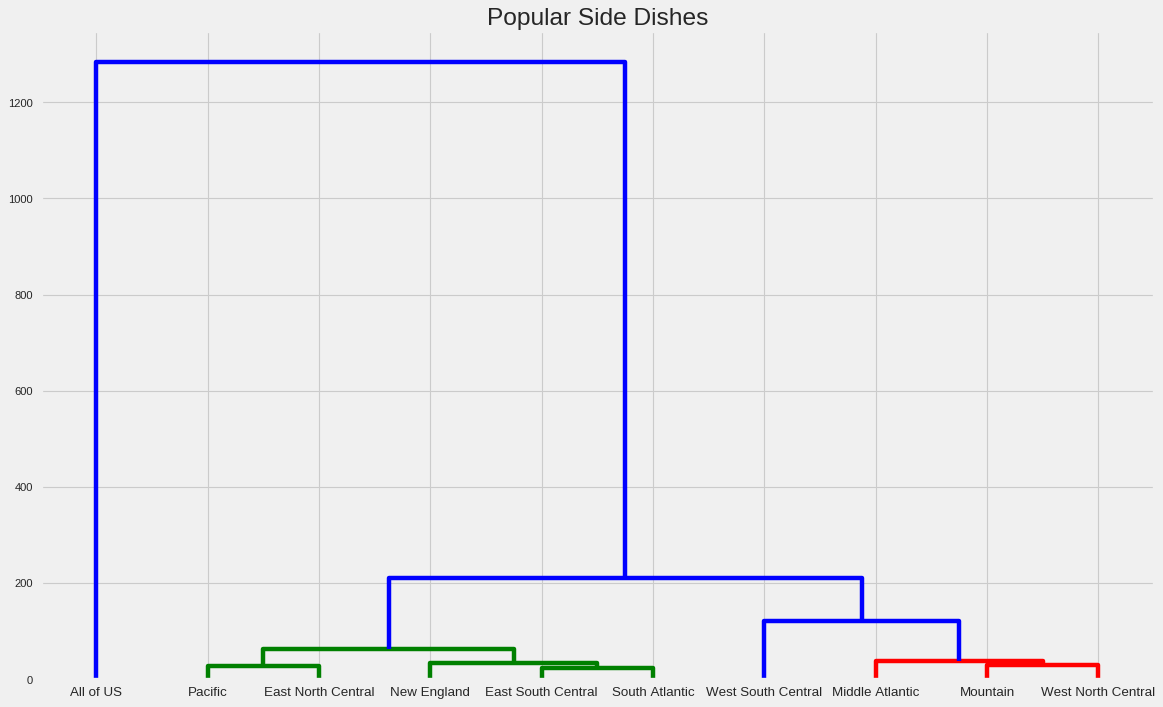

In [42]:
import scipy.cluster.hierarchy as shc

# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("Popular Side Dishes", fontsize=22)  
dend = shc.dendrogram(shc.linkage(popular_side_dishes[list(cols_dict.values())], method='ward'), 
                      labels=popular_side_dishes.index.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()
